# Decision Tree Implelentation

## Step-1: Importing Dataset
## Step-2: Parsing the Dataset

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
lenses = fetch_ucirepo(id=58) 
  
# data (as pandas dataframes) 
X = lenses.data.features 
y = lenses.data.targets 
  
# variable information 
# print(lenses.variables) 

dataframe = lenses.data['original']
print(lenses.data['original'])

    id  age  spectacle_prescription  astigmatic  class
1    1    1                       1           1      3
2    1    1                       1           2      2
3    1    1                       2           1      3
4    1    1                       2           2      1
5    1    2                       1           1      3
6    1    2                       1           2      2
7    1    2                       2           1      3
8    1    2                       2           2      1
9    2    1                       1           1      3
10   2    1                       1           2      2
11   2    1                       2           1      3
12   2    1                       2           2      1
13   2    2                       1           1      3
14   2    2                       1           2      2
15   2    2                       2           1      3
16   2    2                       2           2      3
17   3    1                       1           1      3
18   3    

## Step-3: Visual Representations

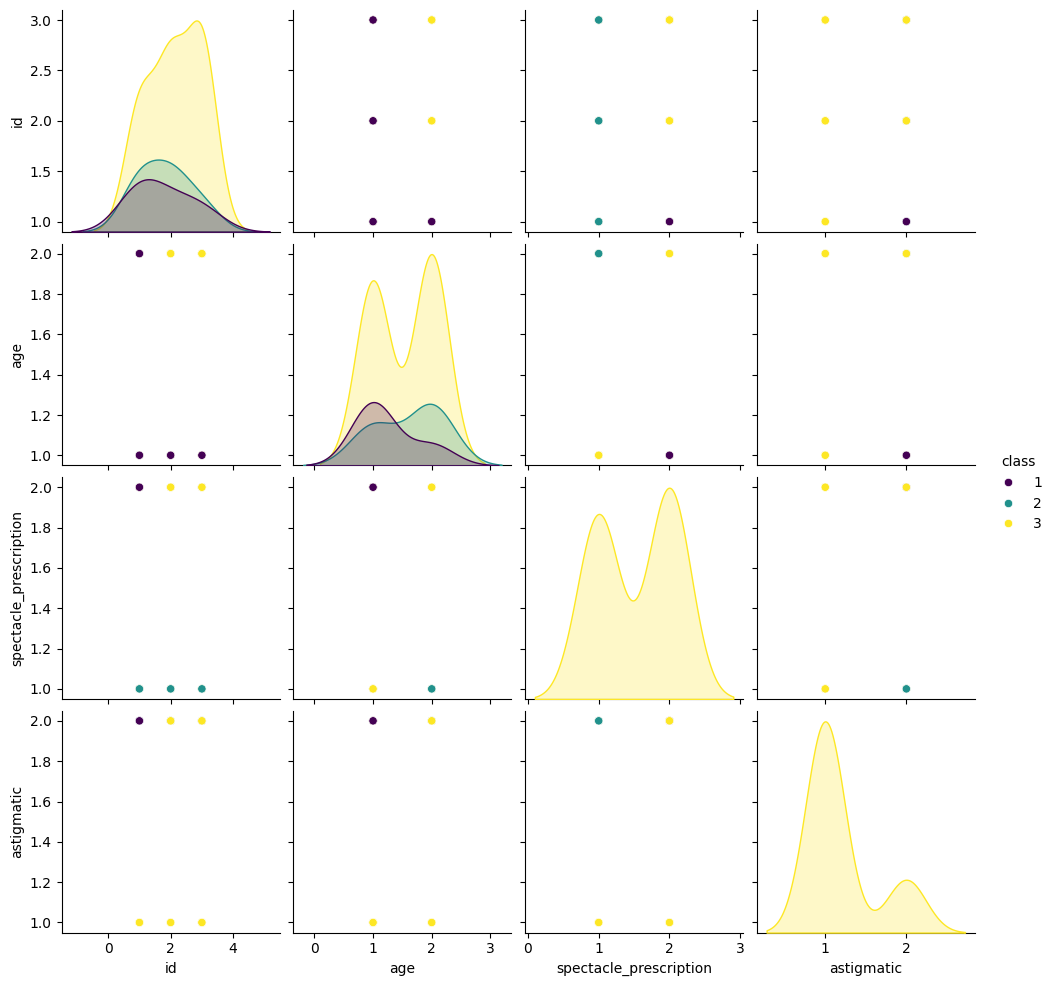

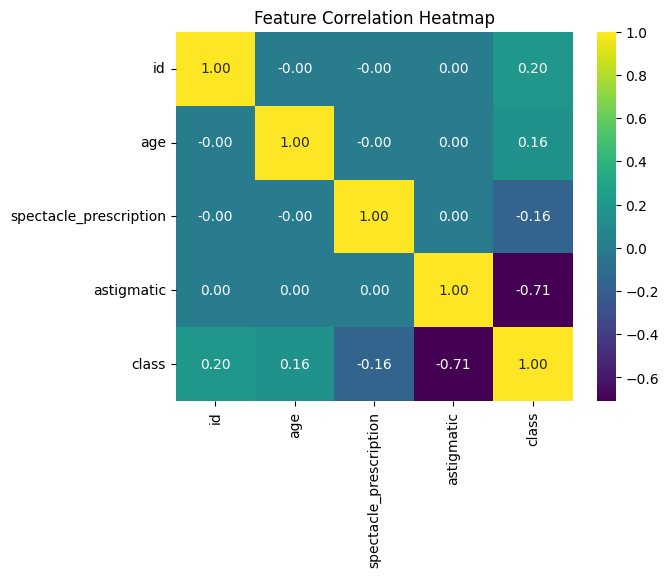

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(dataframe, hue='class', palette='viridis')
plt.show()

corr = dataframe.corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()



## Step-4: Train the Classifier

In [4]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a Classifier and train it
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Predict the response
y_pred = clf.predict(X_test)

## Step-5: Write a function to descend the tree for a given instance

In [5]:
class TreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # Index of the feature to check (e.g., 0 for 'age')
        self.threshold = threshold          # Threshold value for the feature
        self.left = left                    # Left child node
        self.right = right                  # Right child node
        self.value = value                  # Predicted class (for leaf nodes only)


def descend_tree(node, instance):
    """
    Descends the decision tree for a given instance and returns the prediction.
    
    Parameters:
    - node (TreeNode): The root node of the decision tree.
    - instance (list): A list of feature values for a single instance (e.g., [1, 2, 1]).

    Returns:
    - The predicted class at the leaf node.
    """
    while node.left is not None and node.right is not None:  # Traverse until a leaf
        feature_value = instance[node.feature_index]  # Get feature value from instance
        
        # Check the threshold to determine the next branch
        if feature_value <= node.threshold:
            node = node.left
        else:
            node = node.right
    
    return node.value  # Return prediction at the leaf node

# Example decision tree setup (this would normally be constructed by a training algorithm)
leaf1 = TreeNode(value=1)  # For example, "Class 1"
leaf2 = TreeNode(value=2)  # For example, "Class 2"
root = TreeNode(feature_index=0, threshold=1.5, left=leaf1, right=leaf2)  # Root node checks 'age'

# Instance to classify (e.g., age=2, spectacle_prescription=1, astigmatic=1)
instance = [2, 1, 1]

# Predict by descending the tree
prediction = descend_tree(root, instance)
print("Predicted class:", prediction)


Predicted class: 2


## Step-6: Persist the tree data structure so it can be recalled without building the tree; then use it in any application.

In [6]:
import pickle 

def save_tree(tree, filename):
    """
    Saves the decision tree to a file.
    
    Parameters:
    - tree (TreeNode): The root node of the decision tree.
    - filename (str): The name of the file to save the tree.
    """
    with open(filename, 'wb') as f:
        pickle.dump(tree, f)
    print(f"Tree saved to {filename}")


def load_tree(filename):
    """
    Loads the decision tree from a file.
    
    Parameters:
    - filename (str): The name of the file to load the tree from.
    
    Returns:
    - TreeNode: The root node of the loaded decision tree.
    """
    with open(filename, 'rb') as f:
        tree = pickle.load(f)
    print(f"Tree loaded from {filename}")
    return tree


# Save the tree to a file
save_tree(root, 'decision_tree.pkl')

# Later in your application, load the tree
loaded_tree = load_tree('decision_tree.pkl')

Tree saved to decision_tree.pkl
Tree loaded from decision_tree.pkl


## Step-7: Information Gain Function

In [7]:
import pandas as pd
import numpy as np
import math

def entropy(column):
    """
    Calculate the entropy of a column of values.
    
    Parameters:
    - column (list): A list of values in a column (e.g., [1, 0, 0, 1, 1]).
    
    Returns:
    - float: The entropy of the column.
    """
    # Count the frequency of each value
    counts = np.bincount(column)
    probabilities = counts / len(column)
    
    # Calculate entropy
    return -np.sum(prob * np.log2(prob) for prob in probabilities if prob > 0)

def info_gain(left_column, right_column, parent_entropy):
    """
    Calculate the information gain from splitting a parent column into two child columns.
    
    Parameters:
    - left_column (list): The values in the left child column.
    - right_column (list): The values in the right child column.
    - parent_entropy (float): The entropy of the parent column.
    
    Returns:
    - float: The information gain of making the split.
    """
    total_instances = len(left_column) + len(right_column)
    left_weight = len(left_column) / total_instances
    right_weight = len(right_column) / total_instances
    
    left_entropy = entropy(left_column)
    right_entropy = entropy(right_column)
    
    # Weighted average of the child entropies
    split_entropy = (left_weight * left_entropy) + (right_weight * right_entropy)
    
    return parent_entropy - split_entropy